In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import TensorBoard

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
# Fashion DataSet

In [4]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = keras.datasets.fashion_mnist.load_data()
X_TEST  = X_TEST/255.0
X_TRAIN = X_TRAIN/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Looking at the DataSet

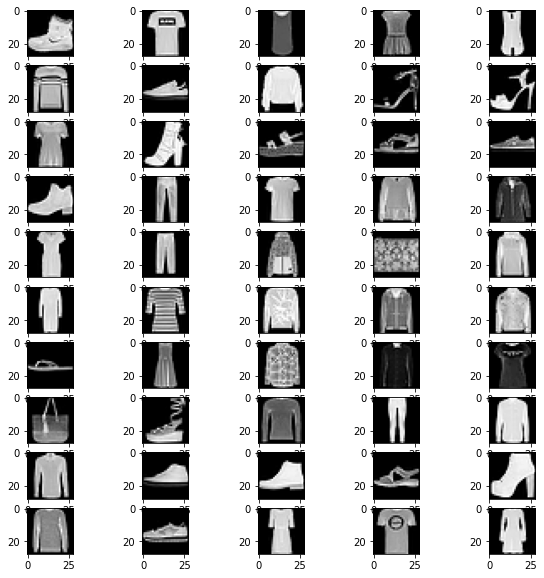

In [6]:
fig,axe = plt.subplots(10,5,figsize=(10,10))

c=0
for i in range(10):
  for j in range(5):
    axe[i,j].imshow((X_TRAIN[c]),cmap='gray')
    c=c+1


In [7]:
# Below module will help in comparing Different Models

In [8]:
from os import walk
import warnings
warnings.filterwarnings( "ignore", message = "WARNING", )
def compare_models(mypath,img):
    

    f = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(dirnames)
        break
        
   
    fig,axe = plt.subplots(2,5,figsize=(15,15))
    i = -1
    j=0
    count = 0
    for path in f:
        p ="Models/"+str(path)
        if p== 'Models/dense_0_values_[64, 32, 16]_output_64_epochs_10_':
            print("Trueeeeeeeeee")
        print(p)
        model = keras.models.load_model(p)
        img2 = model.predict(img.reshape(28,28).reshape(-1,28,28,1))[0]
        j = count%5 
        
        if j==0:
            i = i + 1
       
        axe[i,j].imshow(img2.reshape(28,28),cmap='gray')
        count = count + 1
        

In [9]:
#   Building the Model

In [10]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Input
from keras import Model
import os

In [11]:
# Keeping track of various model, and traning 

In [12]:
Names = []
Models = []
logdir = 'logs'
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [14]:
#%tensorboard — logdir logs

In [16]:
#Conv layer NEWWWWWW


def Conv_Autoencoder(x_train,y_train,conv_values = [16,8,8],shape_x=28, shape_y=28, channel=1, filter_size=(3,3), pool_size=(2,2),epochs= 5,batch_size = 128,decay=1e-6):    
    
    encoder_input = Input(shape=(shape_x,shape_y, channel))
    #conv_layers = []
    layers = []
    shape = shape_x


   
    conv = len(conv_values)
    for i in range(conv):
      
        
        shape = conv_values[i]#int(shape/2) # output of every new Conv would be 1/2 of prev by default
        
        if i == 0:
            layer = Conv2D(shape,filter_size,activation='relu',padding='same')(encoder_input)
        
        else:
            layer = Conv2D(shape,filter_size,activation='relu',padding='same')(layer)
        
        layer = MaxPooling2D(pool_size = pool_size,padding='same')(layer)
     
        
    
    encoded = layer # last layer
    encoder = Model(encoder_input, encoded)
    #encoder = Conv2D(1, filter_size, activation = 'sigmoid' ,padding='same')(encoded)
  
    for i in range(conv):
        shape = conv_values[-i-1]
        print("Decoded : ",shape)
        if i == 0:
            layer = Conv2D(shape,filter_size,activation = 'relu',padding='same')(encoded)
        else:
            if i==2:
              layer = Conv2D(shape,filter_size,activation = 'relu')(layer)
            else:
              layer = Conv2D(shape,filter_size,activation = 'relu',padding='same')(layer)
        
        layer = UpSampling2D(pool_size)(layer)
        
        
    
    decoded = Conv2D(1, filter_size, activation = 'sigmoid' ,padding='same')(layer)
    # ????
    autoencoder = Model(encoder_input,decoded)
    print(autoencoder.summary())
    optimizer = keras.optimizers.Adam(decay=decay)
    autoencoder.compile( optimizer = optimizer , loss='mse' )#loss = 'binary_crossentropy' )
    
    
    
    
    name = "Models/FasionCNN_MODELS_epochs_{}_channel_{}_covlayer_{}_batch_size_{}_decay{}_".format(epochs,channel,conv_values,batch_size,decay)
    name = os.path.join("logs",name)
    tb= TensorBoard(log_dir=name)
    autoencoder.fit(x_train,y_train,epochs=epochs,batch_size = batch_size,callbacks=[tb])
    encoder.save("encoder_{}".format(name))
    autoencoder.save(name)
    Models.append(autoencoder)
    Names.append(name)
    return autoencoder,encoded
        
        

        

In [81]:
x = X_TRAIN#.reshape((len(X_TRAIN),28,28, 1))*
model,enco = Conv_Autoencoder(x,x,epochs=50,conv_values=[64,8])
    

Decoded :  8
Decoded :  64
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         4616      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (No

In [64]:
# LAYERS VIZVALIZATION

In [70]:
# Comparing Models

img_tensor = X_TEST[i]


In [71]:
from keras.models import  Model

In [72]:
layer_outputs = [layer.output for layer in model.layers ]# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input


In [73]:
img2 = img_tensor.reshape(1,28,28,1)

In [74]:
activations = activation_model.predict(img2) # Returns a list of five Numpy arrays: one array per layer activation


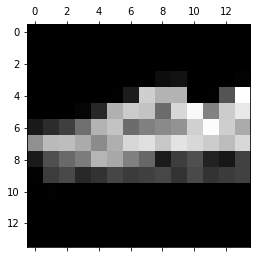

In [75]:
first_layer_activation = activations[2]
plt.matshow(first_layer_activation[0, :, :, 7], cmap='gray')

['logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_', 'logs/Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_[8]_batch_size_128_decay1e-06_', 'logs/Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_[64, 8]_batch_size_128_decay1e-06_']
3
0 logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_ dict_keys([])
Error :  0
1 logs/Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_[8]_batch_size_128_decay1e-06_ dict_keys([])
Error :  1
2 logs/Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_[64, 8]_batch_size_128_decay1e-06_ dict_keys(['loss'])


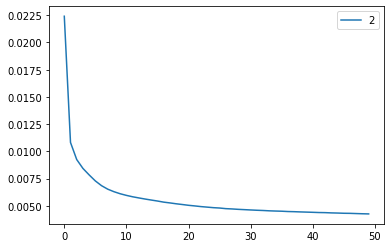

In [82]:
count = 0
lig = []
print(Names)
print(len(Models))
for models in Models:
  
  print(count,Names[count],models.history.history.keys())
  try:
    loss = models.history.history['loss']
    ep = models.history.epoch
    lig.append(count)
    
    plt.plot(ep,loss)
  except:
    print("Error : ",count)
    pass
  count = count + 1
plt.legend(lig)
#model.history.epoch

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


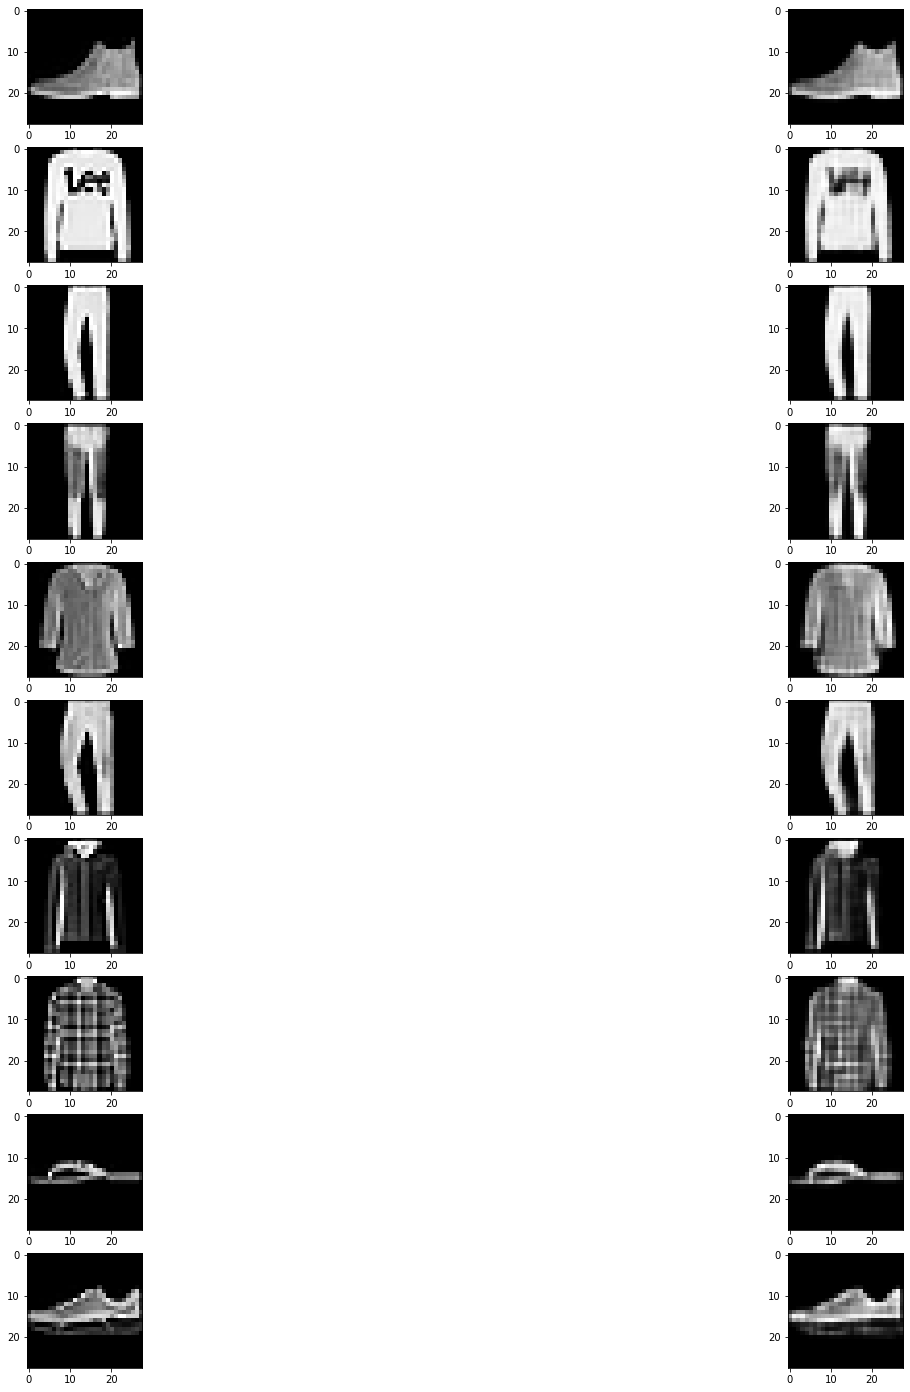

In [83]:
# MODEL RESULTS
rows = 10
fig,axs = plt.subplots(rows,2,figsize=(25,25))

for i in range(len(X_TEST[:rows])):
    
    values = X_TEST[i]
    
    axs[i,0].imshow(values,cmap='gray')
    img = model.predict(values.reshape(-1,28,28,1))[0]
    print(img.shape)
    axs[i,1].imshow(img.reshape(28,28),cmap='gray')
    
   
    

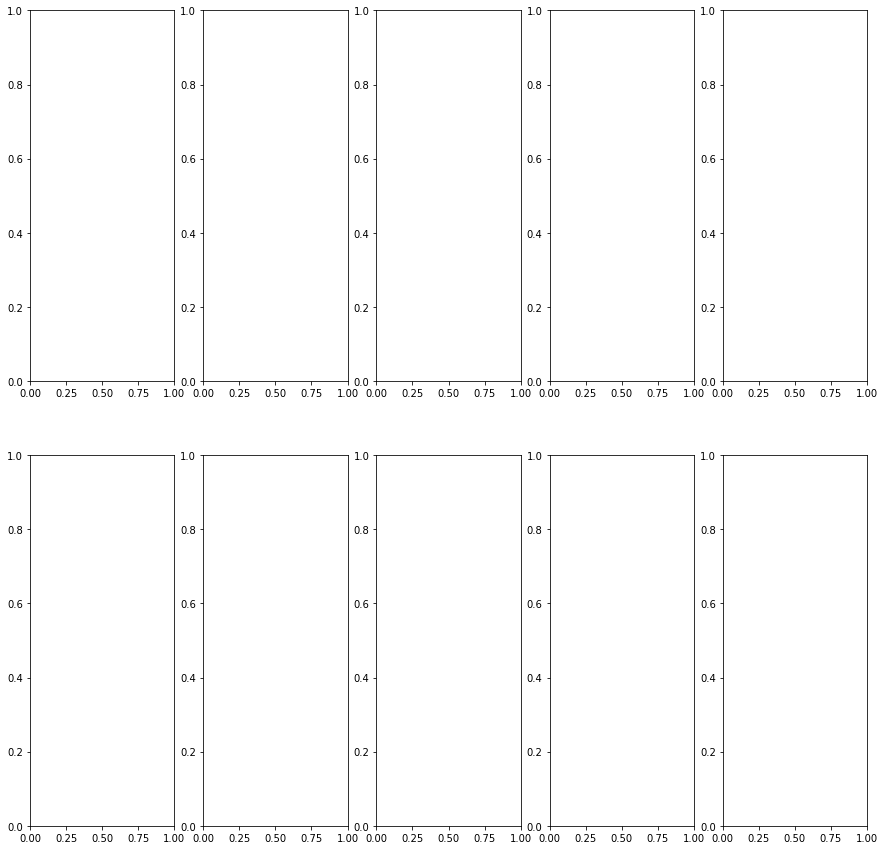

In [78]:
values = X_TEST[1]
compare_models(r"/content/Models",values)

In [68]:
Names

['Models/FasionCNN_MODELS_epochs_10_channel_1_covlayer_3_batch_size_128_decay1e-06_',
 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_64_batch_size_128_decay1e-06_',
 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_[64]_batch_size_128_decay1e-06_']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [63]:
n = Names[2].split('_')
n

['Models/FasionCNN',
 'MODELS',
 'epochs',
 '50',
 'channel',
 '1',
 'covlayer',
 '[64]',
 'batch',
 'size',
 '128',
 'decay1e-06',
 '']

In [64]:
n[7]='64'


In [65]:
n

['Models/FasionCNN',
 'MODELS',
 'epochs',
 '50',
 'channel',
 '1',
 'covlayer',
 '64',
 'batch',
 'size',
 '128',
 'decay1e-06',
 '']

In [66]:
na = '_'.join(n)
na


'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_64_batch_size_128_decay1e-06_'

In [67]:
Names[1] = na

In [69]:
Models

In [71]:
# Download Model Folder

In [84]:
!zip -r /content/downloadModel3.zip /content/encoder_logs/Models

updating: content/encoder_logs/Models/ (stored 0%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_/ (stored 0%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_/keras_metadata.pb (deflated 85%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_/assets/ (stored 0%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_/saved_model.pb (deflated 86%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_/variables/ (stored 0%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_decay1e-06_/variables/variables.index (deflated 29%)
updating: content/encoder_logs/Models/FasionCNN_MODELS_epochs_5_channel_1_covlayer_[8]_batch_size_128_dec